# Detection of characteristics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import math

In [2]:
def matrices_xy(image, filtre):

    if filtre == 'Prewitt':
        filtre_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        filtre_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif filtre == 'Sobel':
        filtre_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        filtre_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    elif filtre == 'Laplacien':
        filtre_x = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        filtre_y = np.array([[1, 1, 1], [1, 8, 1], [1, 1, 1]])

    mx = np.zeros((image.shape[0], image.shape[1]))
    my = np.zeros((image.shape[0], image.shape[1]))

    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            tmp = np.array([[image[i-1, j-1], image[i-1, j], image[i-1, j+1]]
                            , [image[i, j-1], image[i, j], image[i, j+1]]
                            , [image[i+1, j-1], image[i+1, j], image[i+1, j+1]]])
            mx[i][j] = abs(np.sum(tmp * filtre_x))
            my[i][j] = abs(np.sum(tmp * filtre_y))
            
    return(mx, my)

In [3]:
def image_contours_filtre(image, filtre, seuil):
    contours = np.zeros((image.shape[0], image.shape[1]))
    mx, my = matrices_xy(image, filtre)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            contours[i][j] = 1 if (mx[i][j] or my[i][j]) >= seuil else 0
    return(contours)

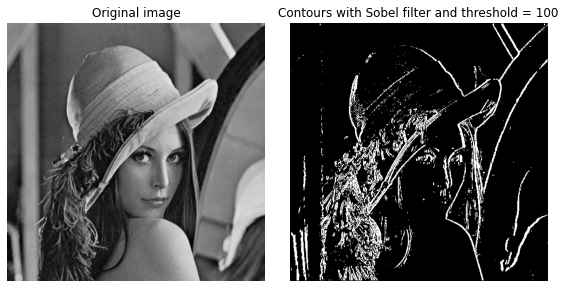

In [7]:
image_lena = np.array(Image.open('img/lena.jpg').convert('L'))

seuil = 100
im_contours_lena = image_contours_filtre(image_lena, 'Sobel',seuil)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_lena, cmap='gray')
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_contours_lena, cmap='gray')
plt.title('Contours with Sobel filter and threshold = ' + str(seuil))
plt.axis('off')

plt.tight_layout()
plt.savefig('img/3_plot_image_contours_filtre.jpg')
plt.show()

In [5]:
seuil_1 = 50
seuil_2 = 100
seuil_3 = 200

im_contours_lena_1 = image_contours_filtre(image_lena, 'Sobel',seuil_1)
im_contours_lena_2 = image_contours_filtre(image_lena, 'Sobel',seuil_2)
im_contours_lena_3 = image_contours_filtre(image_lena, 'Sobel',seuil_3)

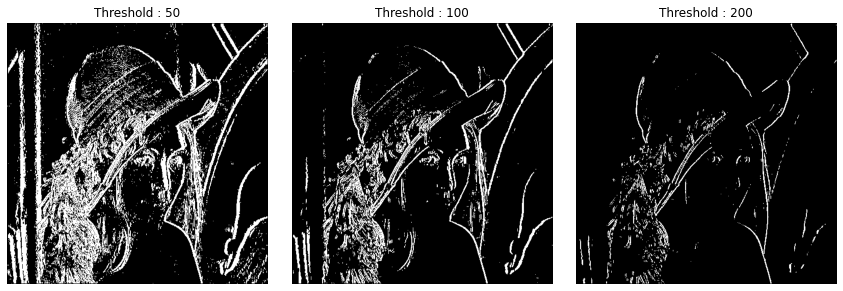

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(im_contours_lena_1, cmap='gray')
plt.title("Threshold : " + str(seuil_1))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im_contours_lena_2, cmap='gray')
plt.title("Threshold : " +  str(seuil_2))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(im_contours_lena_3, cmap='gray')
plt.title("Threshold : " + str(seuil_3))
plt.axis('off')

plt.tight_layout()
plt.savefig('img/3_plot_image_contours_filtre_seuil.jpg')
plt.show()

In [9]:
def matrices_gradient(image):
    Ix = np.zeros((image.shape[0], image.shape[1]))
    Iy = np.zeros((image.shape[0], image.shape[1]))
    Ig = np.zeros((image.shape[0], image.shape[1]))

    filtre_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    filtre_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            tmp = np.array([[image[i-1, j-1], image[i-1, j], image[i-1, j+1]]
                            , [image[i, j-1], image[i, j], image[i, j+1]]
                            , [image[i+1, j-1], image[i+1, j], image[i+1, j+1]]])
            Ix[i][j] = np.sum(tmp * filtre_x)
            Iy[i][j] = np.sum(tmp * filtre_y)
            Ig[i][j] = math.sqrt(Ix[i][j]**2 + Iy[i][j]**2)
            
    return(Ix, Iy, Ig)

In [10]:
def image_contours_gradient(image, seuil):
    contours = np.zeros((image.shape[0], image.shape[1]))
    Ix, Iy, Ig = matrices_gradient(image)
    for i in range(1, image.shape[0]-2):
        for j in range(1, image.shape[1]-2):
            contours[i][j] = 1 if Ig[i][j] >= seuil else 0
    return(contours)

In [11]:
def seuillage_gradient(image):
    Ix, Iy, Ig = matrices_gradient(image)
    min_seuil = Ig.min()
    max_seuil = Ig.max()
    return(min_seuil, max_seuil)

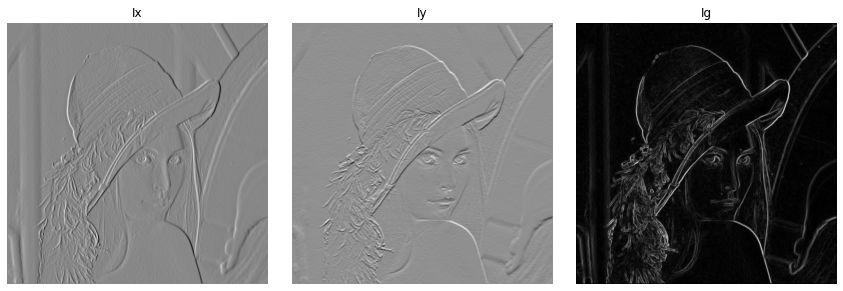

In [12]:
Ix, Iy, Ig = matrices_gradient(image_lena)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(Ix, cmap='gray')
plt.title("Ix")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 2)
plt.imshow(Iy, cmap='gray')
plt.title("Iy")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 3)
plt.imshow(Ig, cmap='gray')
plt.title("Ig")
plt.axis('off')  # Désactive les axes

plt.tight_layout()
plt.show()

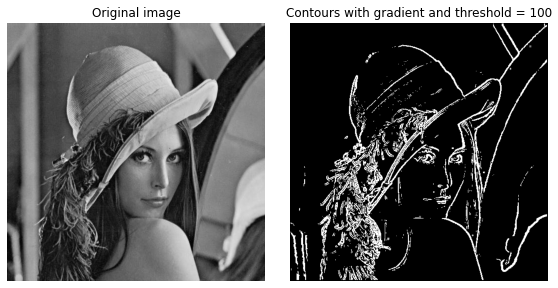

In [15]:
im_contours_lena = image_contours_gradient(image_lena, 100)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_lena, cmap='gray')
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_contours_lena, cmap='gray')
plt.title('Contours with gradient and threshold = 100')
plt.axis('off')

plt.tight_layout()
plt.savefig('img/3_plot_image_contours_gradient.jpg')
plt.show()

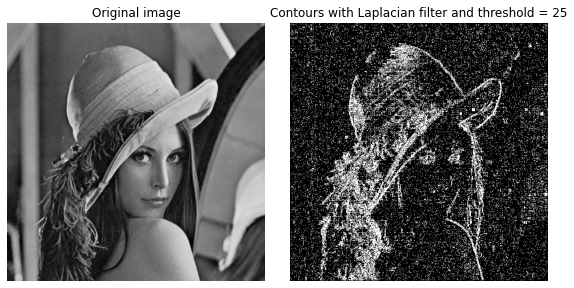

In [16]:
seuil = 25
im_contours_lena = image_contours_filtre(image_lena, 'Laplacien',seuil)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_lena, cmap='gray')
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_contours_lena, cmap='gray')
plt.title('Contours with Laplacian filter and threshold = ' + str(seuil))
plt.axis('off')

plt.tight_layout()
plt.savefig('img/3_plot_image_contours_laplacian.jpg')
plt.show()